# Problem 1


In [482]:
setwd("Downloads")
.libPaths('C:/Users/dkout/Documents/R/win-library/3.4')
options(warn=-1)


ERROR: Error in setwd("Downloads"): cannot change working directory


## (a)

In [167]:
x=read.csv(file="pset4_x.csv", row.names=1 )
dim(x) 
head(x)
apply(x,2,summary) 

[1] 500   3

x1,x2,x3
61.70558,20.05120,58.98837
53.67220,50.72680,65.46915
27.61730,61.10642,57.31497
83.69144,62.63499,76.76225
100.00354,72.74861,66.63606
33.69408,69.68055,57.43625


,x1,x2,x3
Min.,15.24956,20.05120,39.93561
1st Qu.,46.05140,58.28631,59.03002
Median,58.66442,64.17307,63.70577
Mean,62.01869,63.47535,64.18115
3rd Qu.,76.13621,69.51427,69.42850
Max.,138.87584,99.58072,94.48221


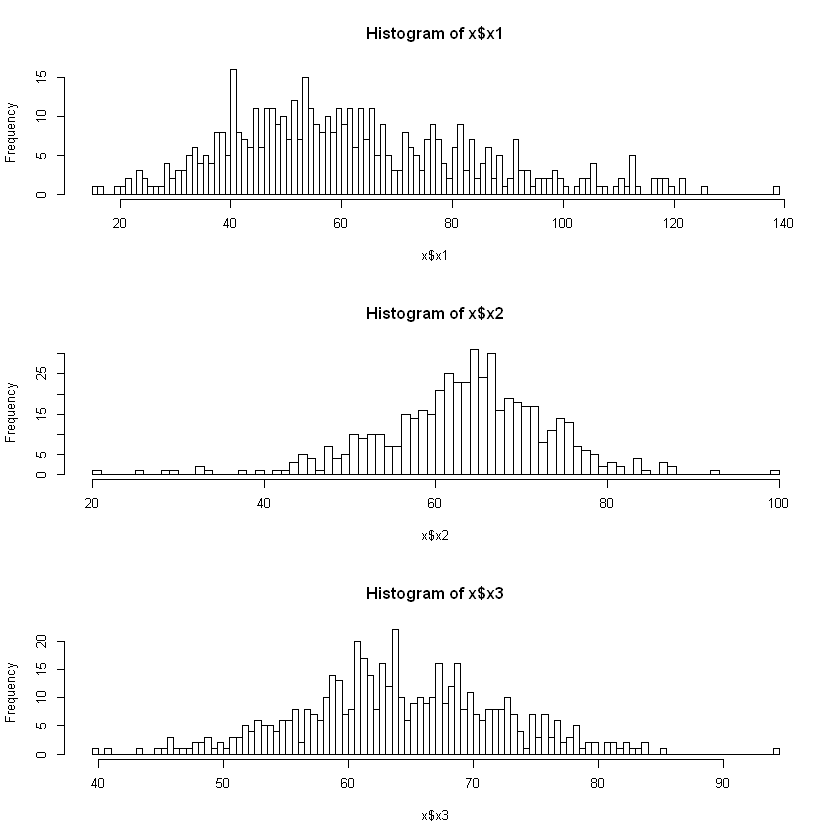

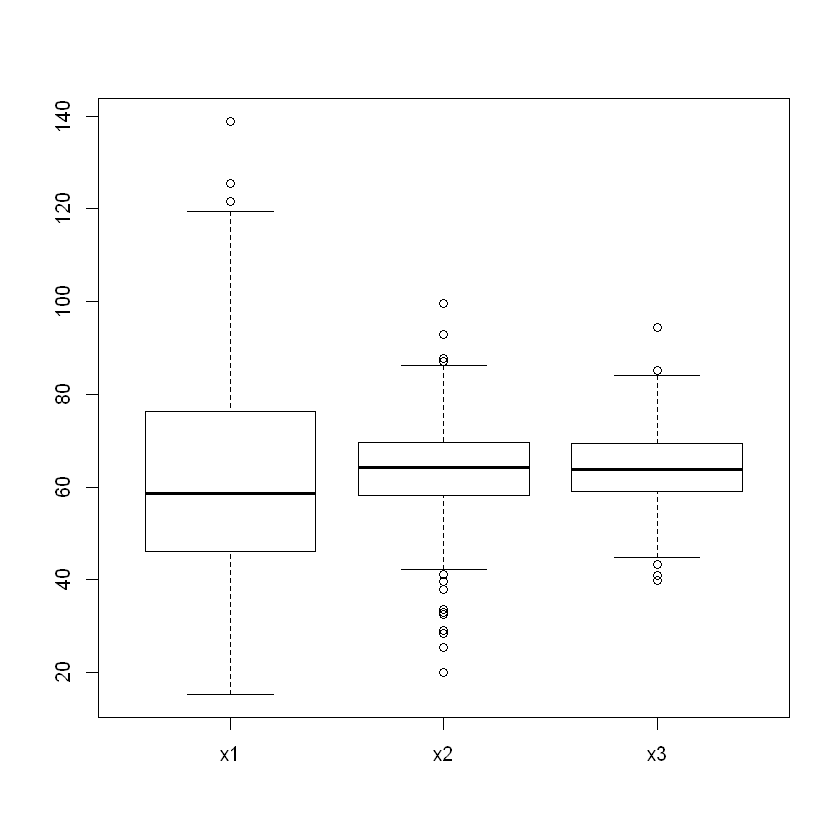

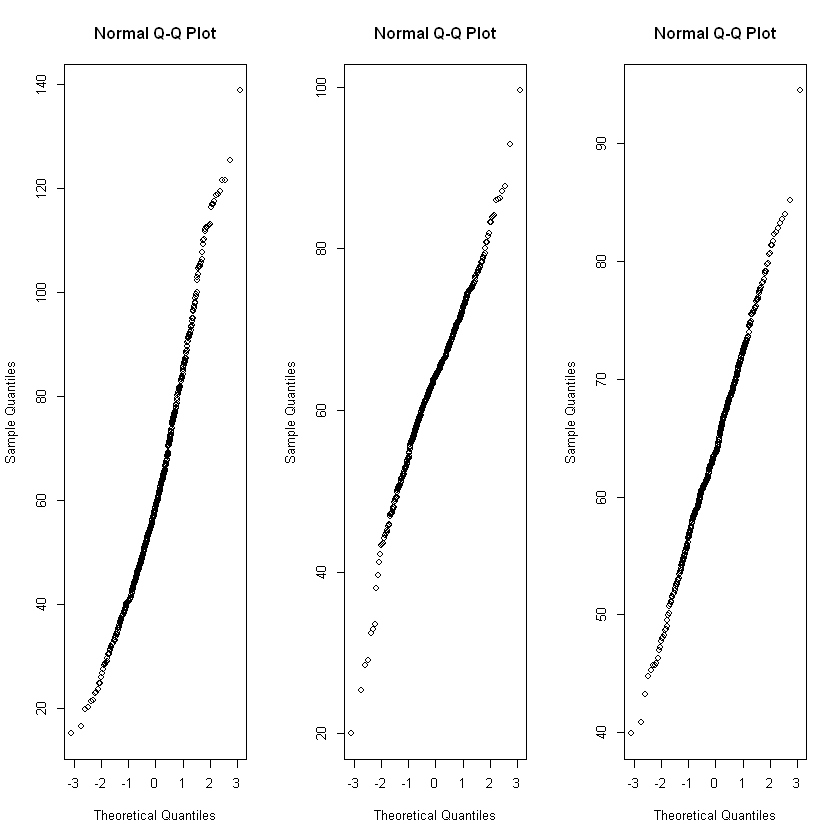

In [168]:
par(mfcol=c(3,1)) 
hist(x$x1,nclass=100) 
hist(x$x2,nclass=100) 
hist(x$x3,nclass=100)

par(mfcol=c(1,1)) 
boxplot(x)
par(mfcol=c(1,3)) 
x.qqnorm.bycolumn<-apply(x,2,qqnorm)


## (b)

In [169]:
library(MASS)
x3=x$x3 
fitdistr.x3.normal<-fitdistr(x3,densfun="normal") 
fitdistr.x3.cauchy<-fitdistr(x3,densfun="cauchy") 
fitdistr.x3.gamma<-fitdistr(x3,densfun="gamma") 
fitdistr.x3.t<-fitdistr(x$x3,densfun="t") 
# Create a table of the $loglik values for the 4 models 
fitdistr.x3.loglikes<-c( normal=fitdistr.x3.normal$loglik,  cauchy=fitdistr.x3.cauchy$loglik, gamma=fitdistr.x3.gamma$loglik, tdist=fitdistr.x3.t$loglik)
fitdistr.x3.loglikes


normal    cauchy     gamma     tdist 
-1754.618 -1838.592 -1756.902 -1754.338

## (c)

In [485]:
fcn.fitall <- function(xin){
    fitdistr.xin.normal<-fitdistr(xin,densfun="normal") 
    fitdistr.xin.cauchy<-fitdistr(xin,densfun="cauchy") 
    fitdistr.xin.gamma<-fitdistr(xin,densfun="gamma")
    fitdistr.xin.t<-fitdistr(xin,densfun="t")
    fitdistr.xin.loglikes<-c( normal=fitdistr.xin.normal$loglik,  cauchy=fitdistr.xin.cauchy$loglik, gamma=fitdistr.xin.gamma$loglik, tdist=fitdistr.xin.t$loglik)
    result<-list( loglikes=fitdistr.xin.loglikes, fitdistr.normal=fitdistr.xin.normal, fitdistr.cauchy=fitdistr.xin.cauchy, fitdistr.gamma=fitdistr.xin.gamma, fitdistr.t=fitdistr.xin.t) 
    return(result) 
}

## (d)

In [171]:
fcn.fitall(x$x1)$loglikes
fcn.fitall(x$x2)$loglikes
fcn.fitall(x$x3)$loglikes

normal    cauchy     gamma     tdist 
-2258.339 -2338.552 -2236.395 -2258.288

normal    cauchy     gamma     tdist 
-1854.649 -1898.829 -1880.582 -1841.067

normal    cauchy     gamma     tdist 
-1754.618 -1838.592 -1756.902 -1754.338

We can see that for x1 the distribution with the highest log likelihood is by the gamma distribution. For x2 the log likelihoods are the highest for t distribution, while for x3, normal and t distribution are almost the same with the t distribution being slightly higher. The model with the most parameter is the t distribution.

## (e)

In [484]:
fcn.plotfitdistr<-function(xin, main0 = "", xlab0 = ""){
    hist(xin, nclass = 100, freq = FALSE, main = main0, xlab = xlab0)
    fit <- fcn.fitall(xin)

    f = function(x){dnorm(x, fit$fitdistr.normal$estimate["mean"],fit$fitdistr.normal$estimate["sd"] )}
    curve(f, add = TRUE, col = "blue")
    f = function(x){dgamma(x, fit$fitdistr.gamma$estimate[1],fit$fitdistr.gamma$estimate[2] )}
    curve(f, add = TRUE, col = "red")
    df = fit$fitdistr.t$estimate["df"]
    m = fit$fitdistr.t$estimate["m"]
    s = fit$fitdistr.t$estimate["s"]
    f = function(x){dt((x-m)/s, df)/s}
    curve(f, add = TRUE, col = "green")
    legend(75,0.03, legend = c("Normal", "Gamma", "T"), col = c("blue", "red", "green"),lty=1, cex=0.8)
    
}

## (f)

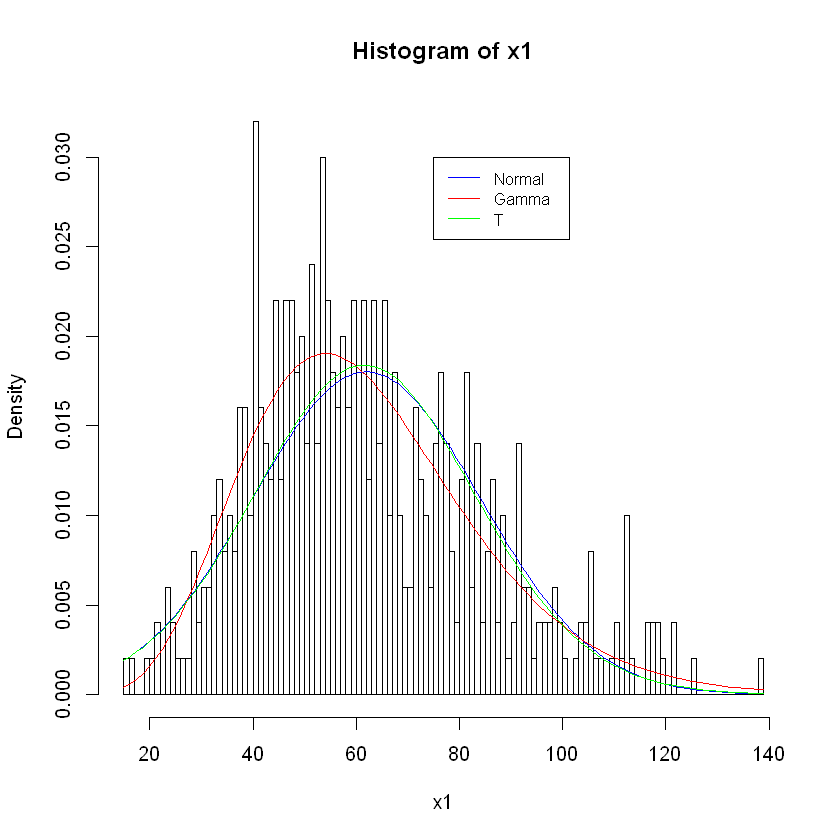

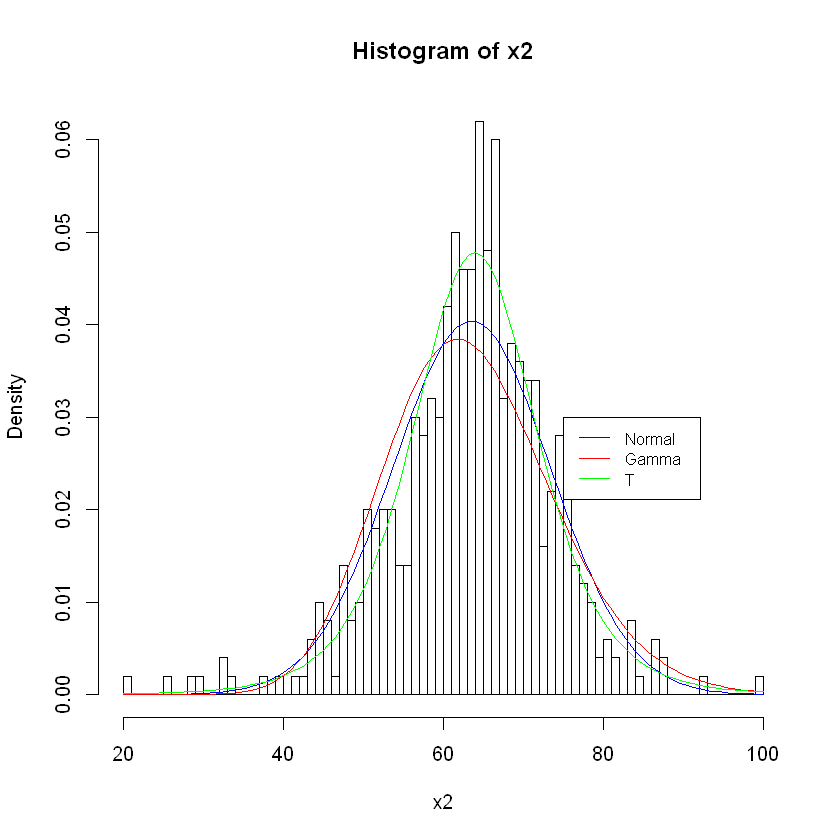

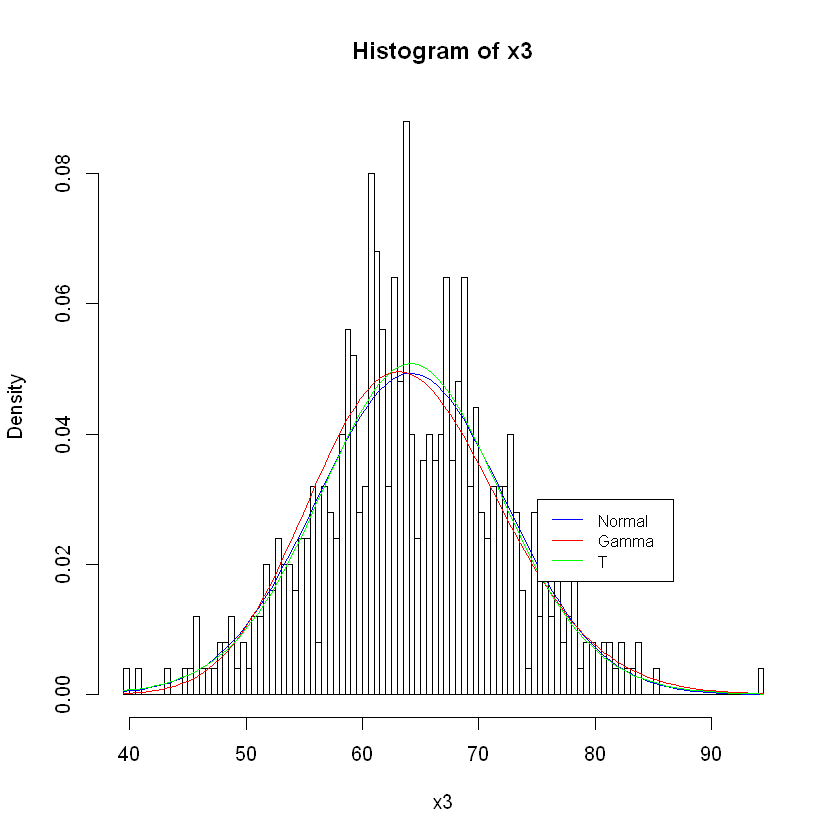

In [173]:
fcn.plotfitdistr(x$x1, "Histogram of x1", "x1")
fcn.plotfitdistr(x$x2, "Histogram of x2", "x2")
fcn.plotfitdistr(x$x3, "Histogram of x3", "x3")

We can see that for x1, the shape of the gamma distribution follows closer the histogram. For x2, the T distribution is by far the best and for x3, they are all roughly the same with the T distribution being a bit of a better fit.

## (g)

In [492]:
names(fitdistr.x3.t)
fitdistr.x3.t$estimate
sd = fitdistr.x3.t$sd
diag_roots = sqrt(diag(fitdistr.x3.t$vcov))
diag_roots
diag_roots == sd

[1] "estimate" "sd"       "vcov"     "loglik"   "n"

m         s        df 
64.170860  7.784243 27.023153

m          s         df 
 0.3604170  0.3598429 24.6769624

m    s   df 
TRUE TRUE TRUE

In general the degrees of freedom show us the number of free parameters. However if the parameters are not free, but are dependent on one another, we can have a df that are non-integer valued.

# Problem 2



In [431]:
library(zoo)
SP500 <- read.zoo(file="SP500.csv")
y<-diff(log(SP500))
y0=ts(y)


In [432]:
y0.ar=ar(x=y0, method="mle")
y0.ar


Call:
ar(x = y0, method = "mle")

Coefficients:
      1        2        3        4  
 0.0351  -0.0177  -0.0275  -0.1454  

Order selected 4  sigma^2 estimated as  6.892e-05

In [433]:
names(y0.ar)

[1] "order"        "ar"           "var.pred"     "x.mean"       "aic"         
 [6] "n.used"       "order.max"    "partialacf"   "resid"        "method"      
[11] "series"       "frequency"    "call"         "asy.var.coef"

In [434]:
ar.est=y0.ar$ar 
ar.sd=sqrt(diag(y0.ar$asy.var.coef)) 
ar.t=ar.est/ar.sd 
ar.pval=2*(1-pnorm(abs(ar.t))) 
coef.table<-cbind(ar.est,ar.sd,ar.t,ar.pval) 
coef.table


ar.est,ar.sd,ar.t,ar.pval
0.03511561,0.04722324,0.7436088,0.457113202
-0.01767442,0.04723482,-0.3741820,0.708268924
-0.02745456,0.04723482,-0.5812355,0.561081738
-0.14544042,0.04722324,-3.0798486,0.002071059


In [435]:
y0.arima.400 <- arima(y0, order=c(p=4,d=0,q=0))
print(y0.arima.400)


Call:
arima(x = y0, order = c(p = 4, d = 0, q = 0))

Coefficients:
         ar1      ar2      ar3      ar4  intercept
      0.0352  -0.0177  -0.0274  -0.1455      1e-04
s.e.  0.0472   0.0478   0.0477   0.0476      3e-04

sigma^2 estimated as 6.892e-05:  log likelihood = 1480.42,  aic = -2948.83


## (a)

In [454]:
cat("direct log likelihood = ", fitdistr(y0,densfun="normal") $loglik)
cat("\nARIMA log-likelihood = ", y0.arima.400$loglik)
#For problem 3
cat("\nAdjusted log-likelihood = ", fitdistr(y0[5:439],densfun="normal") $loglik)
# cat("\nAdjusted log-likelihood = ", arima(y0[5:439], order=c(p=4,d=0,q=0))$loglik)
# names(y0.arima.400)

direct log likelihood =  1475.16
ARIMA log-likelihood =  1480.416
Adjusted log-likelihood =  1460.593

We can see that the two log-likelihoods are very close. 

## (b)

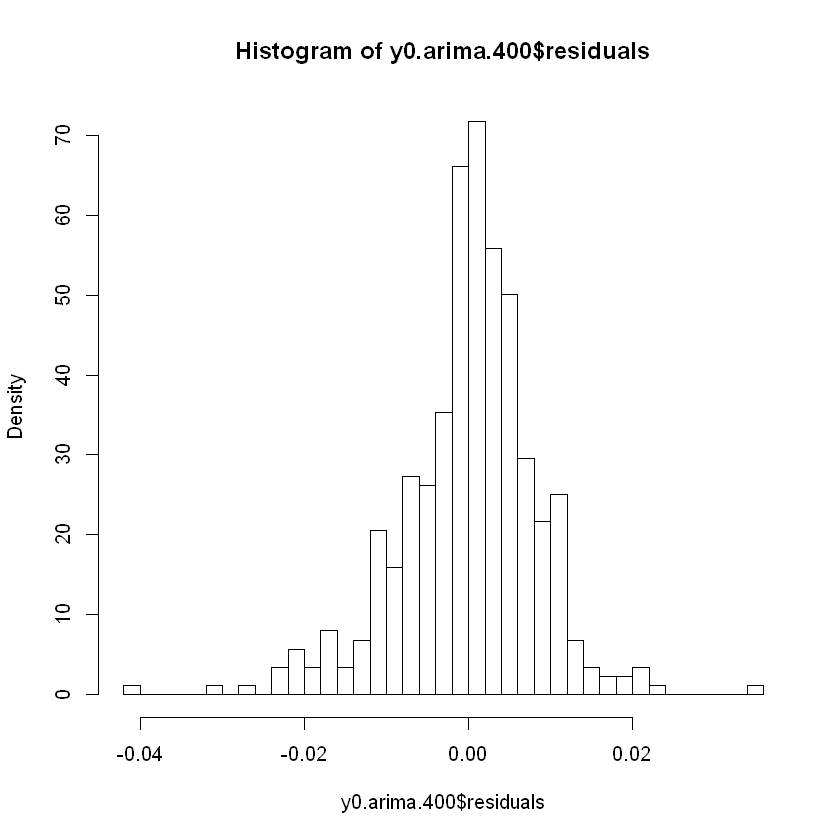

In [495]:
hist(y0.arima.400$residuals, nclass = 50, freq = FALSE)


[1] 6.891922e-05

[1] 0.008311231

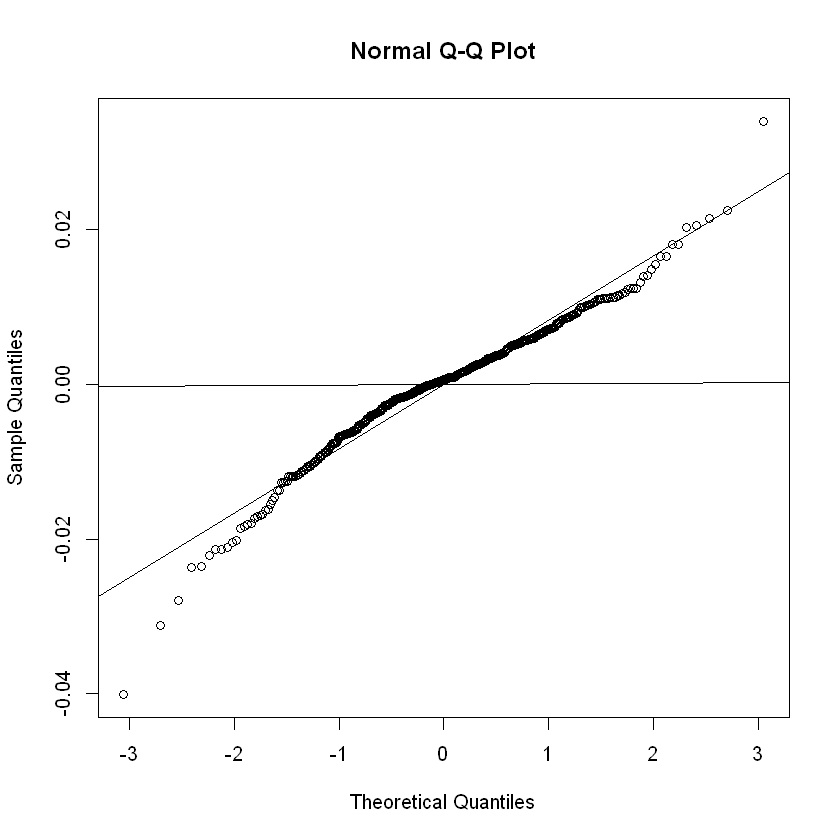

In [438]:
qqnorm(y0.arima.400$residuals)
abline(mean(y0.arima.400$residuals),y0.arima.400$sigma2)#sd(y0.arima.400$residuals))#y0.arima.400$sigma2)
abline(mean(y0.arima.400$residuals),sd(y0.arima.400$residuals))
# qq(dnorm(x, 0, y0.arima.400$sigma2), add = TRUE)
# qqline(y0.arima.400$sigma2)

y0.arima.400$sigma2
sd(y0.arima.400$residuals)

The assumption of a Gaussian Distribution for the errors is fairly accurate as we can see. from the plot. 

## (c)

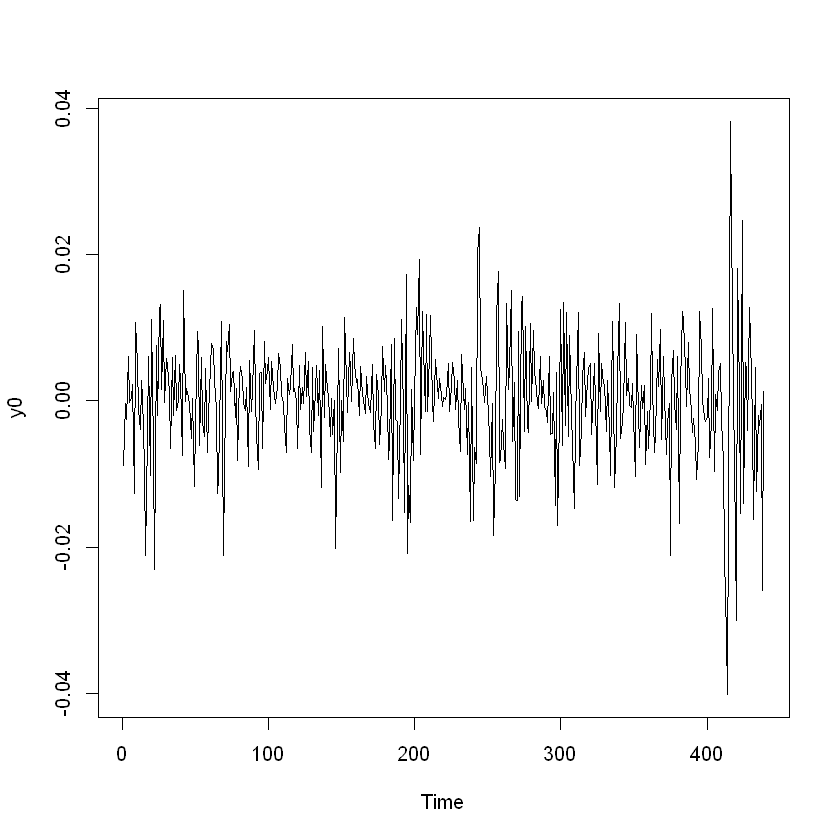

In [439]:
plot(y0)

[1] -0.9704329

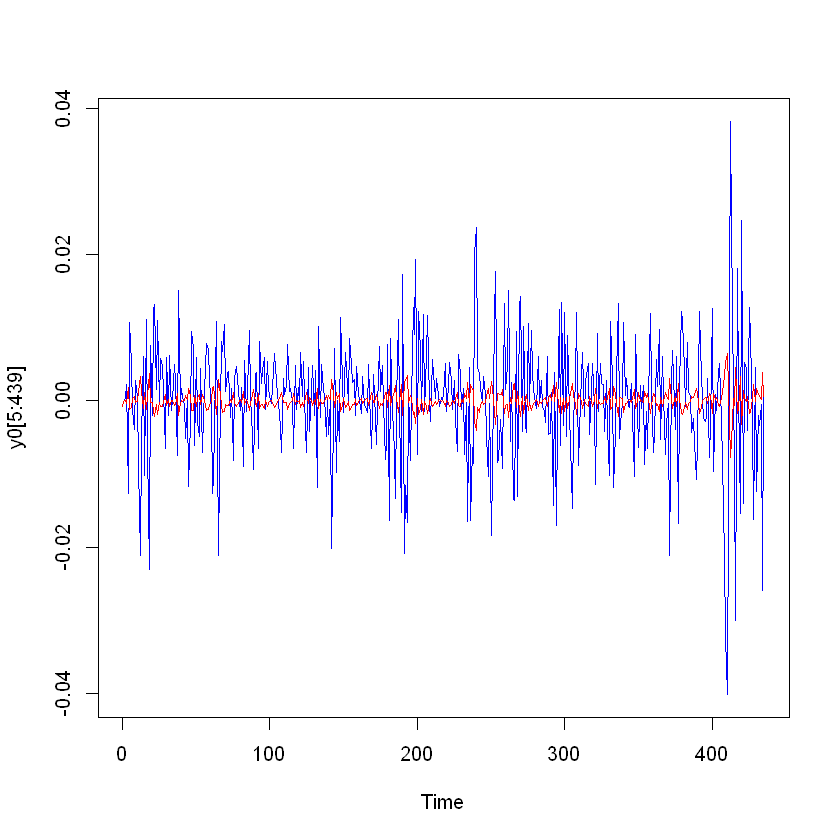

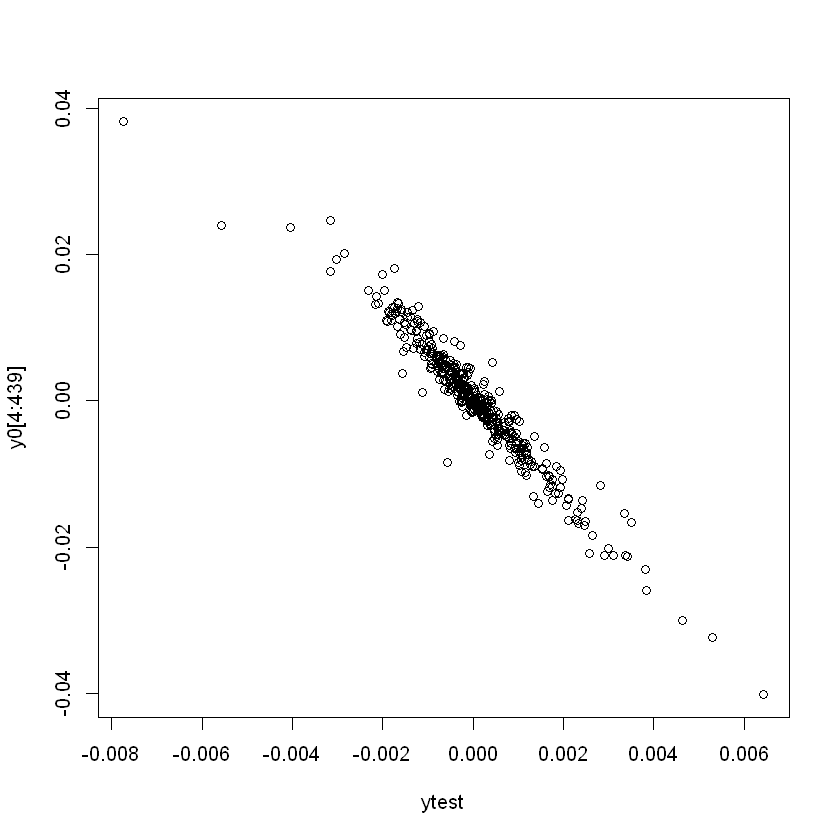

In [443]:

ytest = y0.arima.400$coef["intercept"] + y0.arima.400$coef["ar1"]*(lag(y0,1)) /
+ y0.arima.400$coef["ar2"]*(lag(y0,2)) + y0.arima.400$coef["ar3"]*(lag(y0,3)) + y0.arima.400$coef["ar4"]*(lag(y0,4))

# library(forecast)
# forecast(y0.arima.400, h=439)

ts.plot(y0[5:439], col = "blue")
 lines(ytest, col = "red", add = TRUE)
# s = [y0, ytest]
# ts.plot(s)
cor(ytest,y0[4:439])
plot(ytest,y0[4:439])

# (d)


In [310]:
var(y0)/var(ytest)

[1] 41.61137

We can see that the ratio of their variances is very large; This implies that our actual measurements have much higher variance than our model. This is because our model only depends on four previous values, whereas in real life the returns depend on much more than the returns of the four previous days. We can see that even though the trend of the predictions seems to follow the actual returns, the predictions are much smaller than the returns. The 4-th lag coefficient is very significant but that does not imply that our predictions will be accurate.

# Problem 3

## (a)

In [455]:
y0=as.numeric(y)
 T <- length(y0)
 index.lag0<-c(5:T)
 y0.lag0=y0[index.lag0]
 y0.lag1=y0[index.lag0-1]
 y0.lag2=y0[index.lag0-2]
 y0.lag3=y0[index.lag0-3]
 y0.lag4=y0[index.lag0-4]
 ones=0*y0.lag0+1
 xmat=cbind(ones,y0.lag1,y0.lag2,y0.lag3,y0.lag4)
d = data.frame(xmat)

In [456]:
reg = lm(y0[5:T] ~ ., d)
cat("Differences for coefficients: \n", 
    "AR1: ", 
(reg$coefficients["y0.lag1"]-y0.arima.400$coef["ar1"])/y0.arima.400$coef["ar1"],
    "% \nAR2: ", 
(reg$coefficients["y0.lag2"]-y0.arima.400$coef["ar2"])/y0.arima.400$coef["ar2"], 
    "% \nAR3: ", 
(reg$coefficients["y0.lag3"]-y0.arima.400$coef["ar3"])/y0.arima.400$coef["ar3"], 
    "% \nAR4: ", 
(reg$coefficients["y0.lag4"]-y0.arima.400$coef["ar4"])/y0.arima.400$coef["ar4"], 
    "% \nAR5: ", 
(reg$coefficients["(Intercept)"]-y0.arima.400$coef["intercept"])/y0.arima.400$coef["intercept"], 
    "%" 
    )


Differences for coefficients: 
 AR1:  0.006327481 % 
AR2:  0.04286504 % 
AR3:  -0.05649815 % 
AR4:  0.005380629 % 
AR5:  0.3522581 %

As we can see, the paramaters are very close to what we found earlier, as they are different by very few percentage points.
## (b)

In [457]:
errors = y0[4:439]-
reg$coefficients["y0.lag1"]*y0.lag1[1:435]+
reg$coefficients["y0.lag2"]*y0.lag2[1:435]+
reg$coefficients["y0.lag3"]*y0.lag3[1:435]+
reg$coefficients["y0.lag4"]*y0.lag4[1:435]+
reg$coefficients["(Intercept)"]


In [458]:

fitdistr(errors,densfun="normal") $loglik



[1] 1472.72

Which is close to what we found in part 2 (1475).
The adjusted log-likelihood of part 2 was 1460.593.

## (c)

In [481]:
mydlaplace<-function(x, location=0,scale=1){
dx=(0.5/scale)* exp(-abs(x-location)/scale)
    return(dx)
}
mlefit <- fitdistr(y0[5:439],densfun=mydlaplace, list(location=0, scale=1))
mlefit$loglik

[1] 1485.924

The log-likelihood of this model is higher than the previous estimates which means that this model fits the data better than the previous models we have calculated.
